In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.11.0
1.21.5


In [2]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [4]:
resize_images("./data/scissor")
resize_images("./data/rock")
resize_images("./data/paper")

100  images to be resized.
100  images resized.
100  images to be resized.


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_44556\342146961.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [6]:
image_dir_path = "./data/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0

print("x_train_norm shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train_norm shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


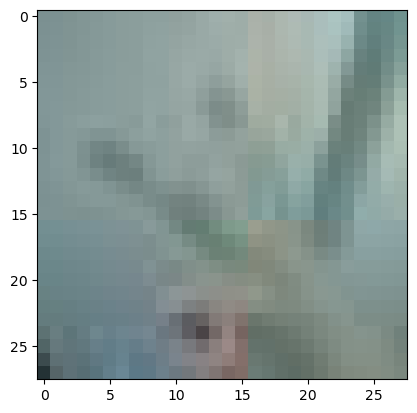

In [7]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [8]:
model=keras.models.Sequential()

model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(1,1))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  12
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (

In [9]:
x_train_norm.shape

(300, 28, 28, 3)

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=300)

Epoch 1/300
10/10 [==============================] - 2s 64ms/step - loss: 1.1055 - accuracy: 0.3300
Epoch 2/300
10/10 [==============================] - 1s 71ms/step - loss: 1.0996 - accuracy: 0.2967
Epoch 3/300
10/10 [==============================] - 1s 61ms/step - loss: 1.0993 - accuracy: 0.3100
Epoch 4/300
10/10 [==============================] - 1s 67ms/step - loss: 1.0991 - accuracy: 0.3100
Epoch 5/300
10/10 [==============================] - 1s 75ms/step - loss: 1.0992 - accuracy: 0.3200
Epoch 6/300
10/10 [==============================] - 1s 72ms/step - loss: 1.0985 - accuracy: 0.3333
Epoch 7/300
10/10 [==============================] - 1s 79ms/step - loss: 1.0972 - accuracy: 0.4033
Epoch 8/300
10/10 [==============================] - 1s 70ms/step - loss: 1.0969 - accuracy: 0.3733
Epoch 9/300
10/10 [==============================] - 1s 70ms/step - loss: 1.0964 - accuracy: 0.3367
Epoch 10/300
10/10 [==============================] - 1s 65ms/step - loss: 1.0791 - accuracy: 0.4367

10/10 [==============================] - 1s 72ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 82/300
10/10 [==============================] - 1s 82ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 83/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 84/300
10/10 [==============================] - 1s 80ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 85/300
10/10 [==============================] - 1s 74ms/step - loss: 0.0162 - accuracy: 0.9933
Epoch 86/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 87/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 88/300
10/10 [==============================] - 1s 78ms/step - loss: 0.0056 - accuracy: 0.9967
Epoch 89/300
10/10 [==============================] - 1s 72ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 90/300
10/10 [==============================] - 1s 76ms/step - loss: 0.0019 - accuracy: 1.0000
Epo

10/10 [==============================] - 1s 101ms/step - loss: 9.2892e-04 - accuracy: 1.0000
Epoch 160/300
10/10 [==============================] - 1s 77ms/step - loss: 0.0107 - accuracy: 0.9933
Epoch 161/300
10/10 [==============================] - 1s 78ms/step - loss: 5.8920e-04 - accuracy: 1.0000
Epoch 162/300
10/10 [==============================] - 1s 70ms/step - loss: 0.0063 - accuracy: 0.9967
Epoch 163/300
10/10 [==============================] - 1s 76ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 164/300
10/10 [==============================] - 1s 86ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 165/300
10/10 [==============================] - 1s 84ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 166/300
10/10 [==============================] - 1s 91ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 167/300
10/10 [==============================] - 1s 88ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 168/300
10/10 [==============================] - 1s 85ms/step - loss: 3.2405e-04 

10/10 [==============================] - 1s 83ms/step - loss: 8.7884e-05 - accuracy: 1.0000
Epoch 237/300
10/10 [==============================] - 1s 79ms/step - loss: 5.2361e-05 - accuracy: 1.0000
Epoch 238/300
10/10 [==============================] - 1s 85ms/step - loss: 3.8359e-05 - accuracy: 1.0000
Epoch 239/300
10/10 [==============================] - 1s 95ms/step - loss: 2.3994e-04 - accuracy: 1.0000
Epoch 240/300
10/10 [==============================] - 1s 94ms/step - loss: 7.5477e-05 - accuracy: 1.0000
Epoch 241/300
10/10 [==============================] - 1s 76ms/step - loss: 3.0627e-05 - accuracy: 1.0000
Epoch 242/300
10/10 [==============================] - 1s 81ms/step - loss: 7.6495e-05 - accuracy: 1.0000
Epoch 243/300
10/10 [==============================] - 1s 94ms/step - loss: 4.8815e-05 - accuracy: 1.0000
Epoch 244/300
10/10 [==============================] - 1s 72ms/step - loss: 1.9338e-04 - accuracy: 1.0000
Epoch 245/300
10/10 [==============================] - 1s 63

dict_keys(['loss', 'accuracy'])


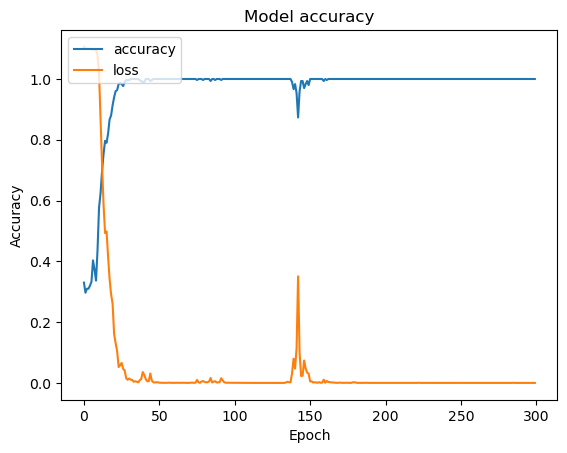

In [11]:
print(history.history.keys())
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'loss'], loc='upper left')

plt.show()


In [12]:
resize_images("./data/test/paper")
resize_images("./data/test/scissor")
resize_images("./data/test/rock")

100  images to be resized.


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_44556\342146961.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [13]:
image_dir_path = "./data/test/"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

print(np.min(x_train_norm), np.max(x_train_norm))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
0.0 0.8627450980392157


라벨:  0


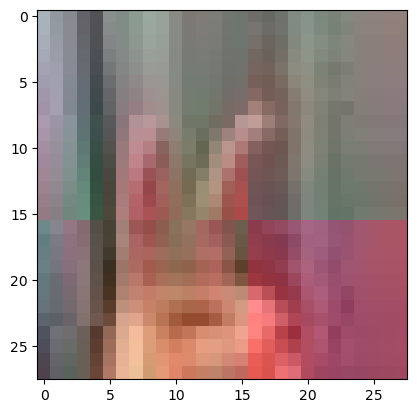

In [14]:
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_norm ,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 6.9661 - accuracy: 0.6867 - 357ms/epoch - 36ms/step
test_loss: 6.966082572937012
test_accuracy: 0.6866666674613953


In [16]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=4  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

10/10 [==============================] - 0s 17ms/step
model.predict() 결과 :  [9.9998605e-01 1.3916816e-05 1.6771950e-09]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [9.2313397e-01 7.6864876e-02 1.0772610e-06]
라벨: 2, 예측결과: 0


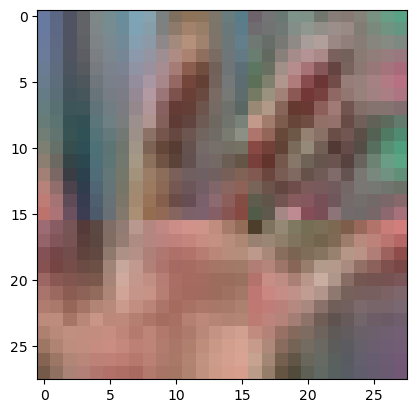

예측확률분포: [2.1054667e-08 1.0000000e+00 1.6518683e-12]
라벨: 2, 예측결과: 1


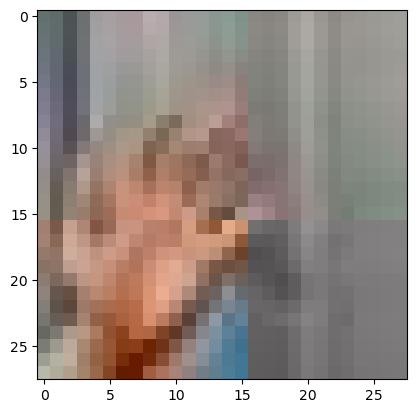

예측확률분포: [0.3048002  0.11160651 0.5835933 ]
라벨: 1, 예측결과: 2


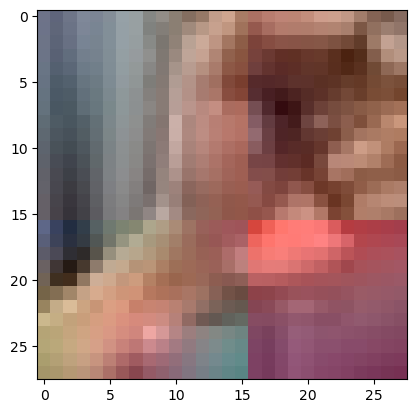

예측확률분포: [1.2781845e-02 9.8721814e-01 1.5405249e-09]
라벨: 2, 예측결과: 1


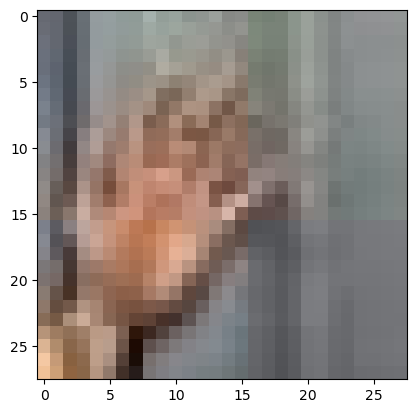

예측확률분포: [2.0607966e-05 9.9997735e-01 2.0024574e-06]
라벨: 2, 예측결과: 1


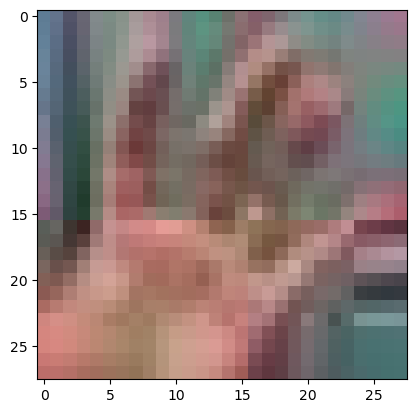

In [17]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()